# Week7 - Decision Tree Lab & HW

## LAB

* Do a quick EDA to understand your data and explain what you need for your pipeline.
* Explain what metric would be appropriate for this task (1 sentence).
* Explain your game plan
* Create a preprocessing pipeline (without the model).


## HW

* Train-test split
* Create 2 new pipelines for the following 2 models and use preprocessing pipeline you created in the previous step
    * a decison tree model https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    * a random forest model https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Define params for GridSearchCV for both models
* Evaluate the models

* Explain findings

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [23]:
# DON'T CHANGE ANYTHING HERE....

random.seed(42)
def remove_values(df, cols, perc=0.001):
    for i in cols:
        mask = pd.Series(random.choices([0,1], weights=[perc, 1-perc], k=len(df[i])))
        df[i] = [ x if i==1 else None for x, i in zip(df[i], mask)]

def create_df(size=1000000):
    from sklearn.datasets import make_classification

    X, y = make_classification(
        n_samples=size,
        n_features=5,
        n_informative=5,
        n_redundant=0,
        n_classes=2,
        flip_y=0.2,
        random_state=4
    )
    
    df = pd.DataFrame(X)
    df.columns = ['f1', 'f2', 'f3', 'f4', 'f5']
    df.f1 = df.f1**2
    df.f2 = df.f2**2
    df.f3 = df.f3*1000
    
    flag = random.choices([True, False], weights=[0.65, 0.35], k=len(y))
    f6 = ['A' if i == 0 else 'B' for i in y]
    
    f6 = [f if i else ('B' if f=='A' else 'A') for i,f in zip(flag, f6)]
    df['f6'] = f6
    
    remove_values(df, df.columns, perc=0.05)
    
    return df, pd.Series(y)
    
X, y = create_df()

In [24]:
X.head()

,f1,f2,f3,f4,f5,f6
0,3.083178,3.022878,1276.390696,-2.672085,1.085629,B
1,NaN,1.764094,-873.709051,2.084035,0.387268,A
2,8.663599,NaN,-563.461158,-0.044922,2.512673,A
3,NaN,3.899908,753.129656,1.565944,-3.771516,A
4,0.684772,22.623978,-392.739840,-0.136113,-2.028027,A


In [25]:
X.describe()

,f1,f2,f3,f4,f5
count,9.499330e+05,9.498840e+05,949804.000000,950444.000000,950149.000000
mean,2.970269e+00,2.698242e+00,1.203865,-0.002337,-0.000394
std,4.223559e+00,3.863111e+00,1441.308642,1.682211,1.683646
min,7.464873e-15,4.200556e-12,-6319.721066,-8.364699,-7.067953
25%,3.265102e-01,3.144912e-01,-1077.181298,-1.172712,-1.186616
50%,1.415231e+00,1.310581e+00,-403.563631,0.067817,0.001923
75%,3.905995e+00,3.501739e+00,1009.950057,1.156616,1.152483
max,9.069379e+01,8.512300e+01,7402.596849,9.717087,8.354947


<Axes: >

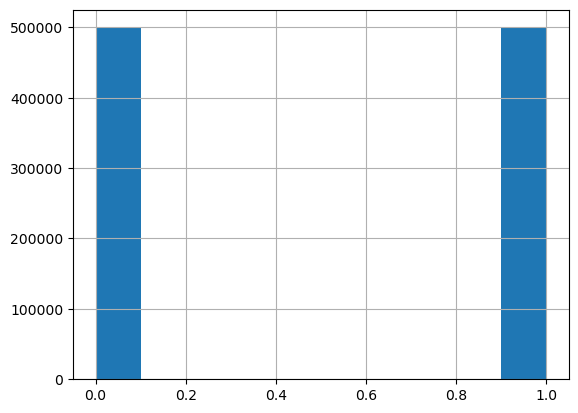

In [26]:
y.hist()

In [27]:
X.isna().sum()

f1    50067
f2    50116
f3    50196
f4    49556
f5    49851
f6    50017
dtype: int64

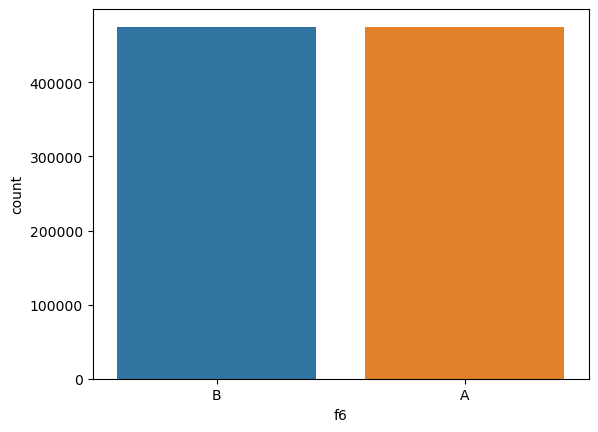

In [28]:
sns.countplot(x='f6', data=X)
plt.show()

Since this is a balanced dataset, we can select accuracy as the metric to assess model performances.

For the pipeline, we have to use imputation, one hot encodng and scaling as preprocessing methods
And for classification we can use Decision Tree Classifier and Random Forest Classifier

In [29]:
num_vars=['f1','f2', 'f3', 'f4', 'f5']
cat_vars=['f6']

numerical_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  
])

categorical_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

processing_pipeline=ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, num_vars),
        ('cat', categorical_pipeline, cat_vars)
    ]
)

## HW

In [30]:
Xs=X[:10000]
ys=y[:10000]

X_train, X_test, y_train, y_test=train_test_split(Xs, ys, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Testing set size: 2000 samples


In [31]:
dt_modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('ml', DecisionTreeClassifier())]
)
dt_modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3', 'f4',
                                                   'f5']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['f6'])])),
                ('ml', DecisionTreeClassifier())])

In [32]:
dt_modeling_pipeline.fit(X_train, y_train)
dt_predictions=dt_modeling_pipeline.predict(X_test)

In [33]:
dt_param_grid = [
    {
        'ml__max_depth':[7, 10, 12],
        'ml__min_samples_split':[4, 7, 10],
        'ml__min_samples_leaf':[3, 4, 5]
    }
]

scoring ='accuracy'

dt_gc = GridSearchCV(estimator=dt_modeling_pipeline, param_grid=dt_param_grid, cv=5, scoring=scoring)
dt_gcv_results = dt_gc.fit(X_train, y_train)

In [34]:
dt_gcv_results.best_params_

{'ml__max_depth': 7, 'ml__min_samples_leaf': 5, 'ml__min_samples_split': 4}

In [35]:
dt_gcv_results.score(X_train, y_train)

0.815625

In [36]:
dt_gcv_results.score(X_test, y_test)

0.788

###### Firstly, i got scores 0.87 for training set and 0.78 for test set which had a huge gap and this could be because of overfitting, so i decreased max_depth and increased min_sample_split and min_sample_leaf, now the scores for training and test are 0.81 and 0.78 this is ensuring good performance on both training and test sets

In [37]:
rf_modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('ml', RandomForestClassifier())]
)
rf_modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3', 'f4',
                                                   'f5']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['f6'])])),
                ('ml', RandomForestClassifier())])

In [38]:
rf_param_grid = [
    {
        'ml__n_estimators':[100, 200],
        'ml__max_depth':[7, 9, 11],
        'ml__min_samples_split':[2, 4],
        'ml__min_samples_leaf':[1, 2]
    }
]

scoring = 'accuracy'

rf_gc = GridSearchCV(estimator=rf_modeling_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring)
rf_gcv_results = rf_gc.fit(X_train, y_train)

In [39]:
rf_gcv_results.best_params_

{'ml__max_depth': 11,
 'ml__min_samples_leaf': 2,
 'ml__min_samples_split': 2,
 'ml__n_estimators': 200}

In [40]:
rf_gcv_results.score(X_train, y_train)

0.8845

In [41]:
rf_gcv_results.score(X_test, y_test)

0.815

##### firstly, i got scores of 0.99 on training set and 0.82 on the test set which is because of overfitting and the model has learned the training data very well, so i again decreased max_depth and increased other parameters, now i have a score of 0.88 on training set and 0.81 on test set.

Explain which model would you go with? 

I would go with Random Forest model because of it's higher accuracy on the test set despite of overfitting, also Random Forest classifier method doesn't require scaling

In [42]:
best_params_rf = {
    'n_estimators': 100,
    'max_depth': 11,
    'min_samples_split': 4,
    'min_samples_leaf': 1
}

rf_best_pipeline = Pipeline(steps=[
    ('preprocessor', processing_pipeline),
    ('classifier', RandomForestClassifier(
        n_estimators=best_params_rf['n_estimators'],
        max_depth=best_params_rf['max_depth'],
        min_samples_split=best_params_rf['min_samples_split'],
        min_samples_leaf=best_params_rf['min_samples_leaf'],
        random_state=42
    ))
])

rf_best_pipeline.fit(X_train, y_train)

train_accuracy = rf_best_pipeline.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

test_accuracy = rf_best_pipeline.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.888125
Test Accuracy: 0.8215


I used the best parameters from the Random Forest Classification method and got the accuracy of 0.88 on training set and 0.82 on test set, this is a better result because of the parameter tuning that we did.